<a href="https://colab.research.google.com/github/Chandrashekar0123/Predictive-Machine-Health/blob/main/Predictive_Analysis_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Predictive Analysis for Manufacturing Operations


#Import all necessary libraries

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

#Load the dataset

In [22]:
data = pd.read_csv('/content/predictive_maintenance.csv')

#Vewing the first 5 rows in the dataset

In [23]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


#Columns of the dataset

In [27]:
data.columns

Index(['UDI', 'Product_ID', 'Type', 'Air_temperature_K',
       'Process_temperature_K', 'Rotational_speed_rpm', 'Torque_Nm',
       'Tool_wear_min', 'Target', 'Failure_Type'],
      dtype='object')

##Preprocessing  techniques

In [28]:
# Rename the columns in the dataset
data.columns = data.columns.str.replace(' ', '_').str.replace('[', '').str.replace(']', '')

# Show the updated dataset with modified column names
print(data.head())

   UDI Product_ID Type  Air_temperature_K  Process_temperature_K  \
0    1     M14860    M              298.1                  308.6   
1    2     L47181    L              298.2                  308.7   
2    3     L47182    L              298.1                  308.5   
3    4     L47183    L              298.2                  308.6   
4    5     L47184    L              298.2                  308.7   

   Rotational_speed_rpm  Torque_Nm  Tool_wear_min  Target Failure_Type  
0                  1551       42.8              0       0   No Failure  
1                  1408       46.3              3       0   No Failure  
2                  1498       49.4              5       0   No Failure  
3                  1433       39.5              7       0   No Failure  
4                  1408       40.0              9       0   No Failure  


#Split the dataset to separate class label and features to predict runtime as it is not in dataset

In [29]:
from sklearn.linear_model import LinearRegression

# Prepare data for regression
X = data[['Air_temperature_K', 'Process_temperature_K', 'Rotational_speed_rpm', 'Torque_Nm']]
y = data['Tool_wear_min']  # Tool wear as a proxy for runtime

#Build the model to get runtime values and add that column to the dataset

In [30]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict runtime on the whole dataset
data['Predicted_Runtime'] = model.predict(X)

##Dataset after having all required features

In [31]:

# Check the first few rows of the dataset to ensure the new column is added
print(data.head())

   UDI Product_ID Type  Air_temperature_K  Process_temperature_K  \
0    1     M14860    M              298.1                  308.6   
1    2     L47181    L              298.2                  308.7   
2    3     L47182    L              298.1                  308.5   
3    4     L47183    L              298.2                  308.6   
4    5     L47184    L              298.2                  308.7   

   Rotational_speed_rpm  Torque_Nm  Tool_wear_min  Target Failure_Type  \
0                  1551       42.8              0       0   No Failure   
1                  1408       46.3              3       0   No Failure   
2                  1498       49.4              5       0   No Failure   
3                  1433       39.5              7       0   No Failure   
4                  1408       40.0              9       0   No Failure   

   Predicted_Runtime  
0         107.707956  
1         108.462129  
2         107.357169  
3         109.183247  
4         109.281120  


#Checking for null values in the dataset

In [32]:
# Check for null values in the dataset
print(data.isnull().sum())

UDI                      0
Product_ID               0
Type                     0
Air_temperature_K        0
Process_temperature_K    0
Rotational_speed_rpm     0
Torque_Nm                0
Tool_wear_min            0
Target                   0
Failure_Type             0
Predicted_Runtime        0
dtype: int64


#Converting String into numerical values

In [34]:
 from sklearn import preprocessing
 le = preprocessing.LabelEncoder()
 le.fit(data.Product_ID)
 data['Product_ID'] = le.transform(data.Product_ID)

 le = preprocessing.LabelEncoder()
 le.fit(data.Type)
 data['Type'] = le.transform(data.Type)

 le = preprocessing.LabelEncoder()
 le.fit(data.Failure_Type)
 data['Failure_Type'] = le.transform(data.Failure_Type)

 print(data)

        UDI  Product_ID  Type  Air_temperature_K  Process_temperature_K  \
0         1        7003     2              298.1                  308.6   
1         2        1003     1              298.2                  308.7   
2         3        1004     1              298.1                  308.5   
3         4        1005     1              298.2                  308.6   
4         5        1006     1              298.2                  308.7   
...     ...         ...   ...                ...                    ...   
9995   9996        9997     2              298.8                  308.4   
9996   9997        1001     0              298.9                  308.4   
9997   9998        9998     2              299.0                  308.6   
9998   9999        1002     0              299.0                  308.7   
9999  10000        9999     2              299.0                  308.7   

      Rotational_speed_rpm  Torque_Nm  Tool_wear_min  Target  Failure_Type  \
0                    

#Changing Attribut names according to the specified input [Machine_ID, Temperature, Run_Time]

In [35]:
data.rename(columns={"Product_ID": "Machine_ID"}, inplace=True)
data.rename(columns={"Process_temperature_K": "Temperature"}, inplace=True)
data.rename(columns={"Predicted_Runtime": "Run_Time"}, inplace=True)
data.rename(columns={"Target": "Downtime_Flag"}, inplace=True)


# Check the class distribution in the 'Downtime_Flag' column

In [38]:
class_counts = data['Downtime_Flag'].value_counts()

# Printing the class distribution

In [39]:
print("Class distribution:")
print(class_counts)

Class distribution:
Downtime_Flag
0    9661
1     339
Name: count, dtype: int64



# Visualize the class distribution

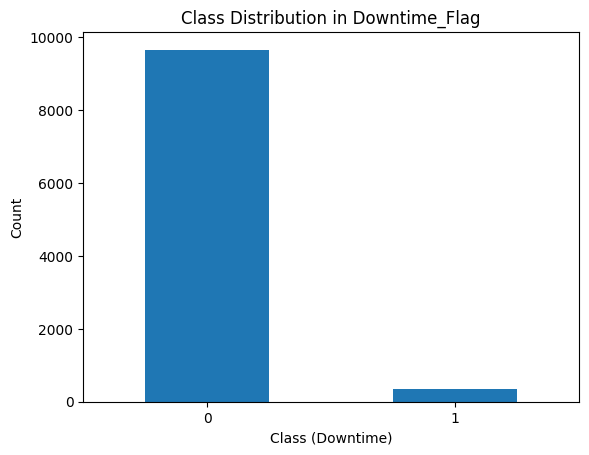

In [41]:
import matplotlib.pyplot as plt

class_counts.plot(kind='bar')
plt.title('Class Distribution in Downtime_Flag')
plt.xlabel('Class (Downtime)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


#TO balance the Class Lables

In [42]:
pip install imbalanced-learn


#Adding random rows to balance the Class Lables

In [45]:
from imblearn.over_sampling import RandomOverSampler

# Random Oversampling to balance the classes
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# Check the new distribution
print("Resampled Class Distribution (Oversampling):")
print(pd.Series(y_resampled).value_counts())


Resampled Class Distribution (Oversampling):
Tool_wear_min
195    95
222    95
53     95
107    95
143    95
       ..
47     95
131    95
165    95
183    95
236    95
Name: count, Length: 245, dtype: int64


#Finding the correlation between each attributes

In [ ]:
corr = data.corr()
corr

,UDI,Machine_ID,Type,Air_temperature_K,Temperature,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Downtime_Flag,Failure_Type,Run_Time
UDI,1.000000,0.463158,0.005529,0.117428,0.324428,-0.006615,0.003207,-0.010702,-0.022892,-0.002152,-0.200978
Machine_ID,0.463158,1.000000,0.866083,0.067602,0.160825,-0.006476,0.005000,-0.011603,-0.016975,-0.006580,-0.091666
Type,0.005529,0.866083,1.000000,0.017599,0.013444,-0.002693,0.004011,-0.003930,-0.005152,-0.008249,0.000085
Air_temperature_K,0.117428,0.067602,0.017599,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556,-0.025327,-0.047729
Temperature,0.324428,0.160825,0.013444,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946,-0.004600,-0.252741
Rotational_speed_rpm,-0.006615,-0.006476,-0.002693,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188,0.079407,-0.488264
Torque_Nm,0.003207,0.005000,0.004011,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321,0.031737,0.064413
Tool_wear_min,-0.010702,-0.011603,-0.003930,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448,0.111619,0.002777
Downtime_Flag,-0.022892,-0.016975,-0.005152,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000,0.470541,-0.184778
Failure_Type,-0.002152,-0.006580,-0.008249,-0.025327,-0.004600,0.079407,0.031737,0.111619,0.470541,1.000000,-0.212012


#Split the dataset to separate class label and features

In [48]:
# Separate features (X) and target (y)
X = data.drop(columns=['Downtime_Flag'])
y = data['Downtime_Flag']

In [49]:
from imblearn.over_sampling import SMOTE


# Apply SMOTE to balance the dataset (before splitting)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)



# Display the first few rows of X and y

In [50]:
print("Features (X):\n", X.shape)
print("\nTarget (y):\n", y.shape)

Features (X):
 (10000, 10)

Target (y):
 (10000,)


In [51]:
X

,UDI,Machine_ID,Type,Air_temperature_K,Temperature,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Failure_Type,Run_Time
0,1,7003,2,298.1,308.6,1551,42.8,0,1,107.707956
1,2,1003,1,298.2,308.7,1408,46.3,3,1,108.462129
2,3,1004,1,298.1,308.5,1498,49.4,5,1,107.357169
3,4,1005,1,298.2,308.6,1433,39.5,7,1,109.183247
4,5,1006,1,298.2,308.7,1408,40.0,9,1,109.281120
...,...,...,...,...,...,...,...,...,...,...
9995,9996,9997,2,298.8,308.4,1604,29.5,14,1,109.313575
9996,9997,1001,0,298.9,308.4,1632,31.8,17,1,108.806633
9997,9998,9998,2,299.0,308.6,1645,33.4,22,1,108.415757
9998,9999,1002,0,299.0,308.7,1408,48.5,25,1,108.436880


In [52]:
y

,Downtime_Flag
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


#Split the datset into training and testing sets

In [53]:
#Split the resampled dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


# Check the resampled class distribution after splitting

In [54]:
print("Resampled Class Distribution (Train set):")
print(y_train.value_counts())
print("\nResampled Class Distribution (Test set):")
print(y_test.value_counts())

Resampled Class Distribution (Train set):
Downtime_Flag
1    7730
0    7727
Name: count, dtype: int64

Resampled Class Distribution (Test set):
Downtime_Flag
0    1934
1    1931
Name: count, dtype: int64


#Build the Decision Tree Model

In [68]:
#Train a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

#Make Predictions
y_pred = model.predict(X_test)

#Evaluate the Model Performance

In [69]:
#Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1934
           1       0.99      0.99      0.99      1931

    accuracy                           0.99      3865
   macro avg       0.99      0.99      0.99      3865
weighted avg       0.99      0.99      0.99      3865



#Save the model

In [70]:
import joblib
joblib.dump(model, 'Decision_tree_model.pkl')
print("Model saved as 'decision_tree_model.pkl'")

Model saved as 'decision_tree_model.pkl'


#Build the LogisticRegression Model

In [63]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model with specified hyperparameters
log_reg_model = LogisticRegression(
    C=1,  # Regularization strength
    penalty='l2',  # Regularization type, 'l2' is the most common
    solver='lbfgs',  # Optimization algorithm (good for larger datasets)
    max_iter=1000,  # Maximum number of iterations for optimization
    random_state=42,  # For reproducibility
    l1_ratio=None,  # Only used if 'elasticnet' penalty is chosen
)

# Train the model on the training data (X_train, y_train)
log_reg_model.fit(X_train, y_train)

# Make predictions with the trained model
y_pred = log_reg_model.predict(X_test)

#Evaluate the Model Performance

In [64]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1934
           1       0.86      0.84      0.85      1931

    accuracy                           0.85      3865
   macro avg       0.85      0.85      0.85      3865
weighted avg       0.85      0.85      0.85      3865



#Save the Model

In [65]:
import joblib
joblib.dump(model, 'LogisticRegression.pkl')
print("Model saved as 'LogisticRegression.pkl'")

Model saved as 'LogisticRegression.pkl'


#Installing all necessary modules to get desired output

In [76]:
pip install flask pandas scikit-learn

In [1]:
!pip install pyngrok==4.1.1

In [3]:
!pip install flask_ngrok

# Authenticate Ngrok with your token
!ngrok authtoken 2rwq2V6fDFhbDZDmrx5mxxwhBwo_4wPq1yP8imGyUA4Z1xPN4

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


#Connecting to drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install requests
!pip install pyngrok


#Access Tokens from ngrok

In [5]:
from pyngrok import ngrok

# Replace 'your_authtoken_here' with your actual ngrok authtoken
ngrok.set_auth_token("2rwq2V6fDFhbDZDmrx5mxxwhBwo_4wPcvbniuyt34567899ugq1yP8imGyUA4Z1xPN4")


In [1]:
!pip install pyngrok --upgrade


In [5]:
from pyngrok import ngrok
public_url = ngrok.connect(5000)
print(f"Flask app is accessible at: {public_url}")


Flask app is accessible at: NgrokTunnel: "https://8e2f-35-227-76-255.ngrok-free.app" -> "http://localhost:5000"


#Creating end point to

1. Accept the files and return confusion metrix

2. Predict the end Point

In [6]:
# Set the folder to store uploaded files in Google Drive
UPLOAD_FOLDER = '/contenkmnt/drnkive/MynknDrive/Comnlab bknNotebooksFlask mUploads'  # Set this to your preferred folder in Google Drive


In [8]:
from flask import Flask, render_template_string, request, jsonify
from werkzeug.utils import secure_filename
import pandas as pd
import os
from pyngrok import ngrok
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Initialize Flask app
app = Flask(__name__)

# Set the folder to store uploaded files
UPLOAD_FOLDER = '/contebnknt/djrive/MyDrkive/Colab juhNotebooks/FlaskUpnnnmloads'  # Change this to your folder path
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

# Set allowed file extensions and required columns
ALLOWED_EXTENSIONS = {'csv'}
REQUIRED_COLUMNS = {'Machine_ID', 'Temperature', 'Downtime_Flag', 'Run_Time'}

# Function to check allowed file extensions
def allowed_file(filename):
    return '.' in filename and filename.rsplit('.', 1)[1].lower() in ALLOWED_EXTENSIONS

# HTML with enhanced CSS for better styling
HTML_PAGE = '''
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>CSV Upload</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color: #f0f8ff;
            margin: 0;
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
        }
        .container {
            text-align: center;
            padding: 30px;
            border-radius: 12px;
            box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.2);
            background-color: white;
            max-width: 400px;
            width: 100%;
        }
        h2 {
            color: #333;
            margin-bottom: 20px;
        }
        input[type="file"] {
            padding: 10px;
            width: 100%;
            margin-bottom: 20px;
            border: 1px solid #ddd;
            border-radius: 5px;
        }
        button {
            padding: 10px 20px;
            background-color: #4CAF50;
            color: white;
            border: none;
            border-radius: 5px;
            cursor: pointer;
            font-size: 16px;
        }
        button:hover {
            background-color: #45a049;
        }
        .result {
            margin-top: 20px;
            padding: 20px;
            border-radius: 8px;
            background-color: #f9f9f9;
            border: 1px solid #ddd;
        }
        .success {
            color: #2e7d32;
        }
        .error {
            color: #d32f2f;
        }
        .warning {
            color: #ff9800;
        }
    </style>
</head>
<body>
    <div class="container">
        {% if step == 1 %}
            <h2>Upload Manufacturing Data</h2>
            <form action="/upload" method="post" enctype="multipart/form-data">
                <input type="file" name="file" accept=".csv">
                <button type="submit">Upload CSV</button>
            </form>
        {% elif step == 2 %}
            <h2>File Accepted Successfully</h2>
            <p><strong>Columns:</strong> {{ columns }}</p>
            <form action="/process" method="post">
                <button type="submit">Process</button>
            </form>
        {% elif step == 3 %}
            <h2>Prediction Results</h2>
            <p><strong>Accuracy:</strong> {{ accuracy }}</p>
            <p><strong>F1 Score:</strong> {{ f1_score }}</p>
            <p><strong>Confusion Matrix:</strong><pre>{{ confusion_matrix }}</pre></p>
            {% if accuracy >= 0.9 %}
                <p class="success">Great job! The model performed excellently!</p>
            {% elif accuracy >= 0.7 %}
                <p class="warning">Good work! But there's room for improvement.</p>
            {% else %}
                <p class="error">Keep trying! There's a lot of potential for improvement.</p>
            {% endif %}
        {% endif %}
    </div>
</body>
</html>
'''

# Store file path globally (to use in the predict function)
uploaded_file_path = None

# Home route to render HTML page
@app.route('/')
def home():
    return render_template_string(HTML_PAGE, step=1)

# Route to handle file upload, validate columns
@app.route('/upload', methods=['POST'])
def upload_file():
    global uploaded_file_path

    if 'file' not in request.files:
        return render_template_string(HTML_PAGE, step=1, result={"success": False, "message": "No file part"})

    file = request.files['file']
    if file and allowed_file(file.filename):
        # Secure the filename and save the file
        filename = secure_filename(file.filename)
        uploaded_file_path = os.path.join(app.config['UPLOAD_FOLDER'], filename)
        os.makedirs(app.config['UPLOAD_FOLDER'], exist_ok=True)
        file.save(uploaded_file_path)

        # Read the CSV file with pandas
        try:
            df = pd.read_csv(uploaded_file_path)

            # Validate required columns
            if REQUIRED_COLUMNS.issubset(df.columns):
                irrelevant_columns = [col for col in df.columns if col not in REQUIRED_COLUMNS]
                if irrelevant_columns:
                    return render_template_string(HTML_PAGE, step=1, result={
                        "success": False,
                        "message": "File contains irrelevant columns: " + ', '.join(irrelevant_columns)
                    })
                return render_template_string(HTML_PAGE, step=2, columns=', '.join(df.columns))

            else:
                return render_template_string(HTML_PAGE, step=1, result={
                    "success": False,
                    "message": "File must contain the required columns: " + ', '.join(REQUIRED_COLUMNS)
                })
        except Exception as e:
            return render_template_string(HTML_PAGE, step=1, result={
                "success": False,
                "message": f"Error processing file: {str(e)}"
            })

    return render_template_string(HTML_PAGE, step=1, result={"success": False, "message": "Invalid file format. Please upload a CSV file."})

# Route to handle model prediction and return metrics
@app.route('/process', methods=['POST'])
def process_data():
    global uploaded_file_path

    if uploaded_file_path:
        # Read the CSV file with pandas
        df = pd.read_csv(uploaded_file_path)

        # Features and target variable
        X = df[['Machine_ID', 'Temperature', 'Run_Time']]  # Features
        y = df['Downtime_Flag']  # Target variable

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Scale the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Train a Logistic Regression model
        model = LogisticRegression(solver='liblinear')
        model.fit(X_train_scaled, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test_scaled)

        # Calculate performance metrics
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        confusion = confusion_matrix(y_test, y_pred).tolist()

        return render_template_string(HTML_PAGE, step=3, accuracy=accuracy, f1_score=f1, confusion_matrix=confusion)
    else:
        return render_template_string(HTML_PAGE, step=1, result={"success": False, "message": "No file uploaded for prediction."})

# Run the Flask app and expose it to the internet via Ngrok
if __name__ == '__main__':
    # Set up Ngrok tunnel for the app
    public_url = ngrok.connect(5000)
    print(f"Flask app is accessible at: {public_url}")
    # Run Flask app
    app.run(port=5000)


Flask app is accessible at: NgrokTunnel: "https://b3c6-35-227-76-255.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [22/Jan/2025 22:09:26] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [22/Jan/2025 22:09:27] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [22/Jan/2025 22:09:36] "POST /upload HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [22/Jan/2025 22:09:39] "POST /process HTTP/1.1" 200 -
